In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import os
from skimage import io
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [2]:
# train_labels = pd.read_csv("train.csv", index_col="image_id")
# test_labels = pd.read_csv("test.csv", index_col="image_id")
# validation_labels = pd.read_csv("validation.csv", index_col="image_id")

train_labels = pd.read_csv("train.csv")
test_labels = pd.read_csv("test.csv")
validation_labels = pd.read_csv("validation.csv")

In [3]:
def show_image(image):
    io.imshow(image.astype(np.float32))
    io.show()

In [4]:
def calculeaza_std_si_mean(folder, label_file):
    pathtodir = os.getcwd()
    pathtodir = os.path.join(pathtodir, folder)
    print(pathtodir)

    aux_imagini = []
    cnt = 0
    for nume_imagine in tqdm(label_file.loc[:, "image_id"]):
        image_name = nume_imagine + ".png"
        pathToImage = os.path.join(pathtodir, image_name)
        imagine = np.array(Image.open(pathToImage))
        imagine = np.ravel(imagine.copy())
        if(imagine.shape == (6400, )):
            # if folder == "train":#in viitor va trb sa sterg imaginile alb/negru
            #     continue
            imagine = np.concatenate((imagine, imagine, imagine))
        #imagine = np.digitize(imagine, intervale)
        #imagine = (imagine - min(imagine))/(max(imagine) - min(imagine))
        aux_imagini.append(imagine)
    imagini = np.array(aux_imagini)
    return (np.mean(imagini), np.std(imagini))
    

In [27]:
def load_images_from_dir(folder, label_file,mean, std):
    pathtodir = os.getcwd()
    pathtodir = os.path.join(pathtodir, folder)
    print(pathtodir)

    aux_imagini = []
    intervale = np.linspace(start=0, stop=1.1, num=25)
    cnt = 0
    for nume_imagine in tqdm(label_file.loc[:, "image_id"]):
        image_name = nume_imagine + ".png"
        pathToImage = os.path.join(pathtodir, image_name)
        imagine = np.array(Image.open(pathToImage))
        imagine = np.ravel(imagine.copy())
        if(imagine.shape == (6400, )):
            # if folder == "train":#in viitor va trb sa sterg imaginile alb/negru
            #     continue
            imagine = np.concatenate((imagine, imagine, imagine))
        #imagine = np.digitize(imagine, intervale)
        img = imagine.copy()
        #imagine = img.astype(np.float32)
        imagine = (img - mean)/ std
        #imagine = (imagine - np.mean(imagine))/np.std(imagine)
        #imagine = imagine/255
        #imagine = np.digitize(imagine, intervale)/25
        
        aux_imagini.append(imagine)
        cnt += 1
    imagini = np.array(aux_imagini)
    return imagini
    

In [28]:
mean, std = calculeaza_std_si_mean("train", train_labels)

C:\Users\Fabi\Desktop\ml\kaggle\Realistic Image Classification @ UnivBuc\train


100%|██████████████████████████████████████████████████████████████████████████| 10500/10500 [00:04<00:00, 2585.24it/s]


In [29]:
train_images = load_images_from_dir("train", train_labels, mean, std)
test_images = load_images_from_dir("test", test_labels, mean, std)
validation_images = load_images_from_dir("validation", validation_labels,mean, std)

C:\Users\Fabi\Desktop\ml\kaggle\Realistic Image Classification @ UnivBuc\train


100%|██████████████████████████████████████████████████████████████████████████| 10500/10500 [00:04<00:00, 2176.76it/s]


C:\Users\Fabi\Desktop\ml\kaggle\Realistic Image Classification @ UnivBuc\test


100%|████████████████████████████████████████████████████████████████████████████| 4500/4500 [00:02<00:00, 2158.41it/s]


C:\Users\Fabi\Desktop\ml\kaggle\Realistic Image Classification @ UnivBuc\validation


100%|████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 2175.51it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


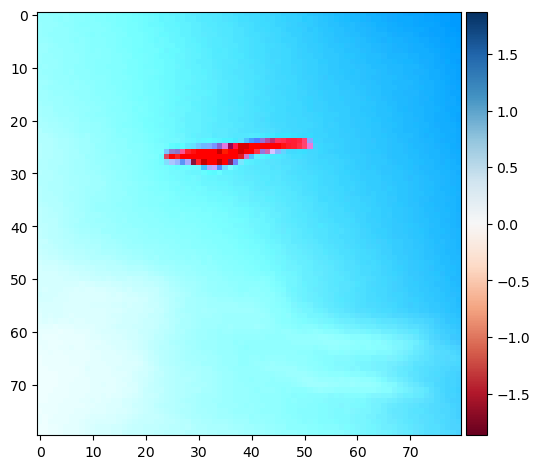

1.58718372427266


In [31]:
show_image(np.reshape(train_images[300], (80, 80, 3))) #279 e interesant
print(max(validation_images[279]))

In [32]:
#incercam un model simplu doar asa ca exemplu
model = SVC(C=2.5)
model.fit(train_images, train_labels.iloc[:, 1])

SVC(C=2.5)

In [33]:
predictions = model.predict(validation_images)

In [34]:
scor = accuracy_score(validation_labels.iloc[:, 1], predictions)
scor

0.526

In [35]:
predictii_test = model.predict(test_images)
raspuns = pd.Series(data=predictii_test, index=test_labels.iloc[:, 0], name="label")
raspuns.to_csv("raspuns.csv")